# Change signal

Assessment of model change signal over the 2080-2099 period relative to the 2000-2019 period.

(Bias-corrected data for the period 2000-2019 and 2080-2099 were produced by training on data from the 1980-1999 period.)

In [49]:
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs

sys.path.append('/g/data/xv83/users/at2708/bias_adjustment/evaluation/npcp/results')
import utils

In [50]:
def calc_change_signal(da_future, da, var):
    """Calculate the difference in the change signal between GCM and RCM """
    
    if var == 'pr':
        change_signal = (da_future.mean(dim='time') - da.mean(dim='time'))/abs(da.mean(dim='time'))*100
    else:
        change_signal = da_future.mean(dim='time') - da.mean(dim='time')
    
    return change_signal

In [51]:
def get_data(var, rcm):
    """Get data needed for the evaluation"""

    assert rcm in ['BOM-BARPA-R', 'UQ-DES-CCAM-2105']
    
 
    da_gcm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        'GCM',
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )

    da_gcm_future = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        'GCM',
        'raw',
        'task-reference',
        '2080-01-01',
        '2099-12-31',
        'AU'
    )
    da_rcm_raw = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_raw_future = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2080-01-01',
        '2099-12-31',
        'AU'
    )
    da_rcm_ecdfm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-historical',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_ecdfm_future = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-projection',
        '2080-01-01',
        '2099-12-31',
        'AU'
    )
    # TODO: Add additional bias correction methods as data becomes available 

    return da_gcm, da_gcm_future, da_rcm_raw, da_rcm_raw_future, da_rcm_ecdfm, da_rcm_ecdfm_future

In [52]:
def plot_mean_bias(ax, da_model_future, da_model, var, cmap, levels, model_name):
    """Plot the mean bias for a particular model"""
    
    change_signal = calc_change_signal(da_model_future, da_model, var)  
    
    units = '%' if var == 'pr' else da_model.attrs['units']
    
    im = change_signal.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels=levels,
        extend='both', 
        add_colorbar=False
    ) #cbar_kwargs={'label': units},
    ax.set_title(model_name)
    ax.coastlines()
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.04)
    cbar.ax.tick_params(labelsize=14)  
    cbar.set_label(units, fontsize=14) 


In [53]:
def plot_comparison(var, rcm, cmap, levels):
    """Plot the complete comparison"""

    da_gcm, da_gcm_future, da_rcm_raw, da_rcm_raw_future, da_rcm_ecdfm, da_rcm_ecdfm_future = get_data(var, rcm)
 
      
    fig = plt.figure(figsize=[24, 6])
    ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax1, da_gcm_future, da_gcm, var, cmap, levels, 'CSIRO-ACCESS-ESM1-5')
    ax1.set_title(f'CSIRO-ACCESS-ESM1-5', fontsize=16)
    
    ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax2, da_rcm_raw_future, da_rcm_raw, var, cmap, levels, f'{rcm} (raw)')
    ax2.set_title(f'{rcm} (raw)', fontsize=16)
    
    ax3 = fig.add_subplot(133, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax3, da_rcm_ecdfm_future, da_rcm_ecdfm, var, cmap, levels, f'{rcm} (ecdfm)')
    ax3.set_title(f'{rcm} (ecdfm)', fontsize=16)
    
    long_name = da_rcm_raw.attrs['long_name']
    plt.suptitle(f'Change signal (model future 2080-2099 base period mean relative to model historical 2000-2019 base period mean) {long_name}', fontsize=16)
    plt.show()

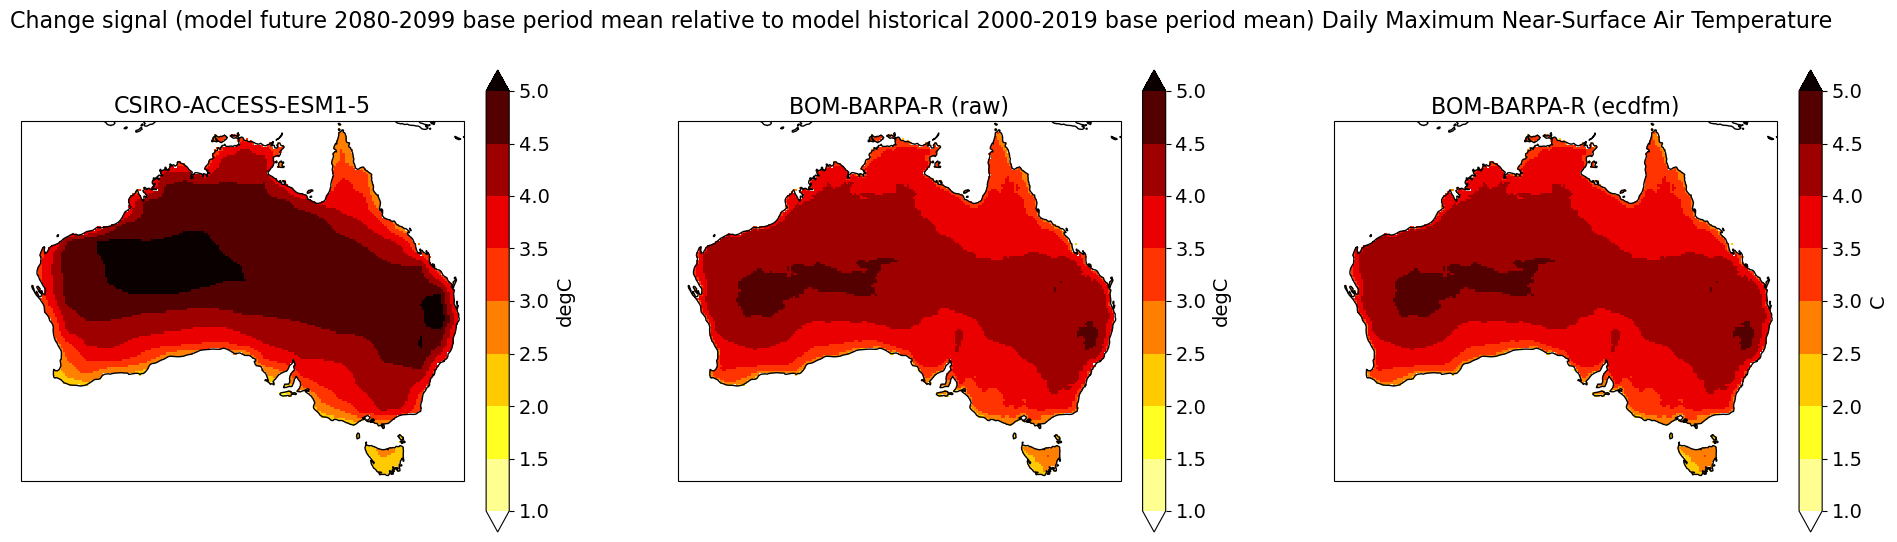

In [54]:
plot_comparison('tasmax', 'BOM-BARPA-R', 'hot_r', np.arange(1, 5.01, 0.5))

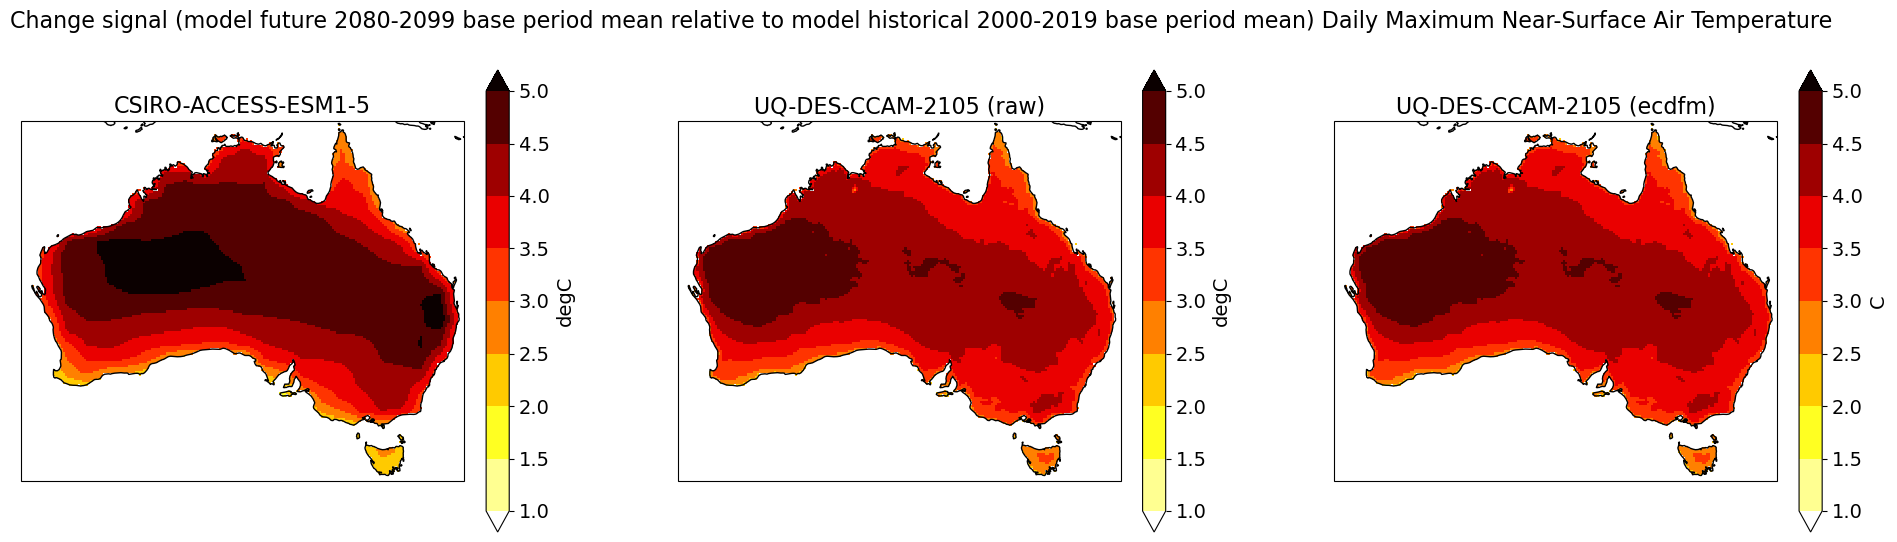

In [55]:
plot_comparison('tasmax', 'UQ-DES-CCAM-2105', 'hot_r', np.arange(1, 5.01, 0.5))

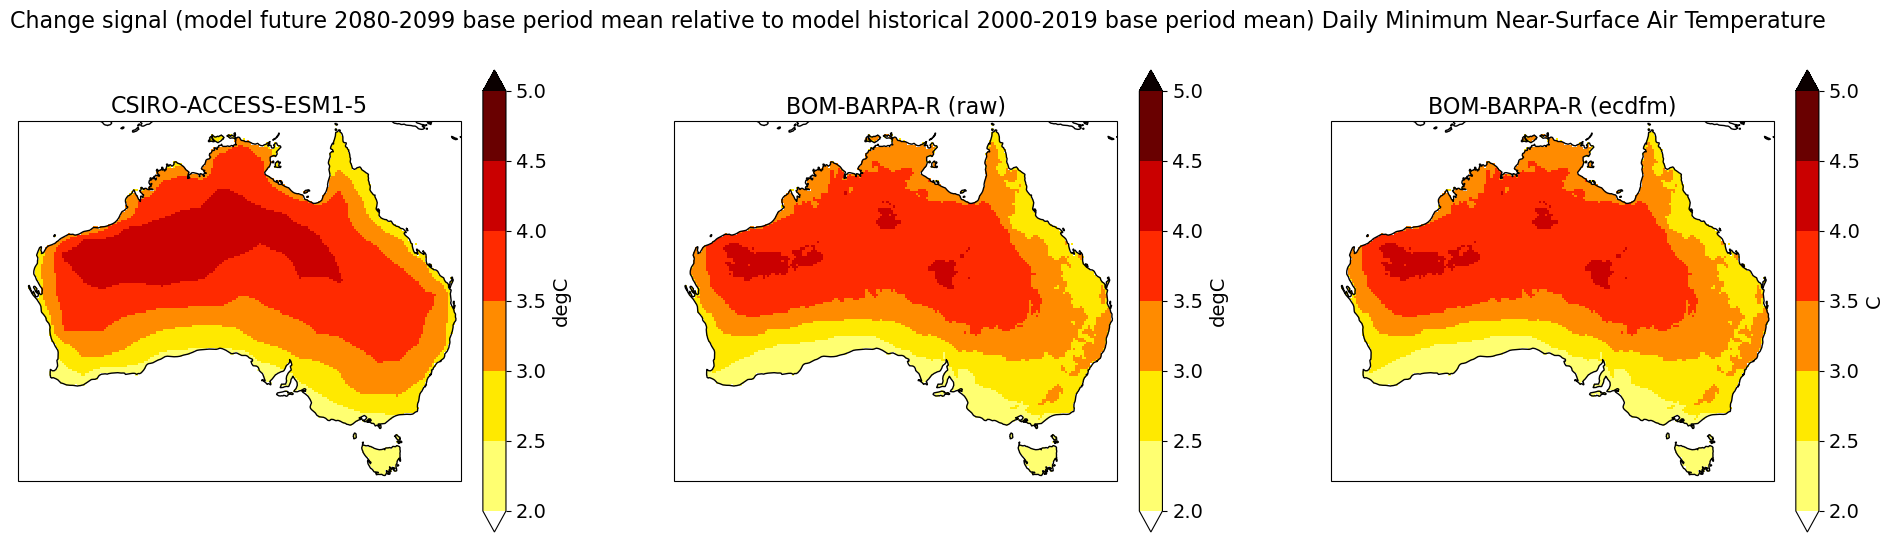

In [56]:
plot_comparison('tasmin', 'BOM-BARPA-R', 'hot_r', np.arange(2, 5.01, 0.5))

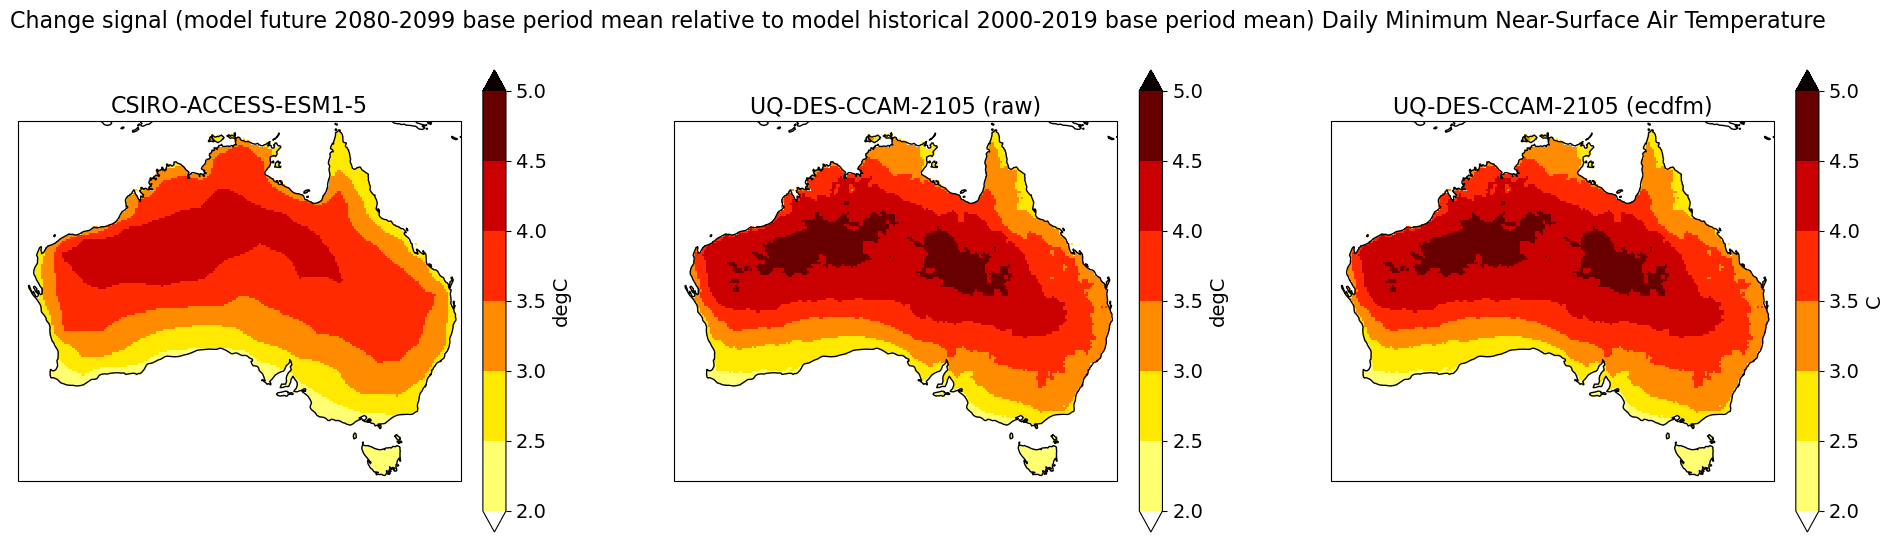

In [57]:
plot_comparison('tasmin', 'UQ-DES-CCAM-2105', 'hot_r', np.arange(2, 5.01, 0.5))

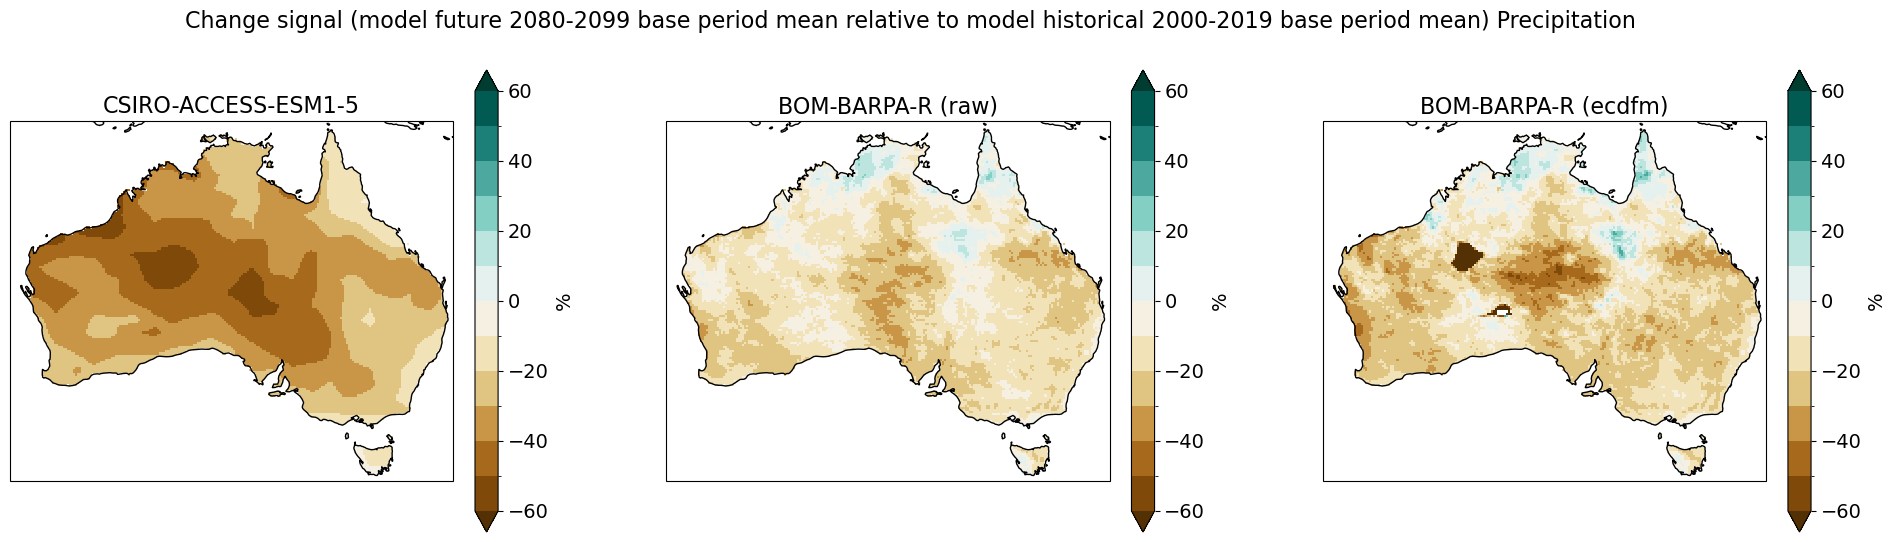

In [62]:
plot_comparison('pr', 'BOM-BARPA-R', 'BrBG', np.arange(-60, 60.1, 10))

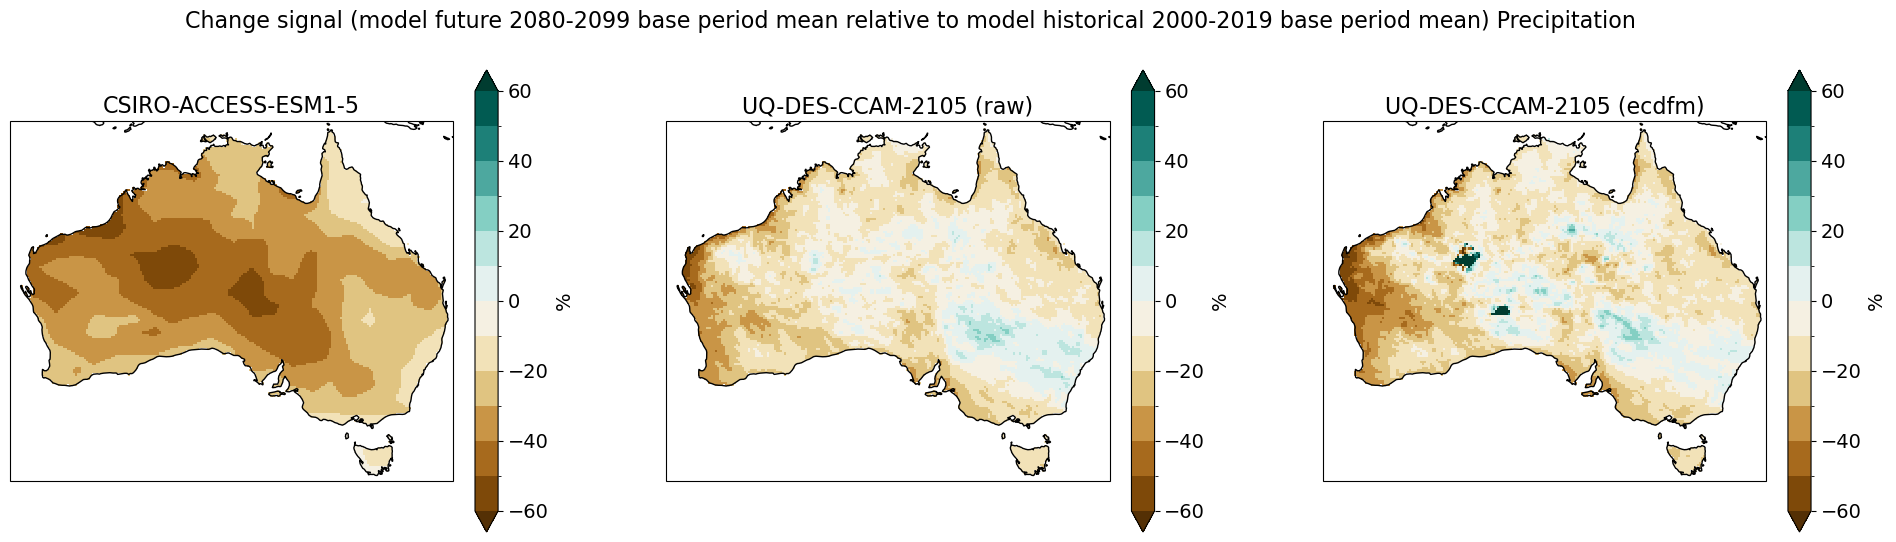

In [63]:
plot_comparison('pr', 'UQ-DES-CCAM-2105', 'BrBG', np.arange(-60, 60.1, 10))

In [105]:
def get_data(var, rcm):
    """Get data needed for the evaluation"""

    assert rcm in ['BOM-BARPA-R', 'UQ-DES-CCAM-2105']
    
    da_rcm_raw = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_raw_future = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2080-01-01',
        '2099-12-31',
        'AU'
    )
    da_rcm_ecdfm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-historical',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_ecdfm_future = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-projection',
        '2080-01-01',
        '2099-12-31',
        'AU'
    )
    # TODO: Add additional bias correction methods as data becomes available 
    change_signal_model_raw = calc_change_signal(da_rcm_raw_future, da_rcm_raw, var)  
    change_signal_model_ecdfm = calc_change_signal(da_rcm_ecdfm_future, da_rcm_ecdfm, var) 
    return  change_signal_model_ecdfm, change_signal_model_raw, da_rcm_raw

In [106]:
def plot_mean_bias(ax, change_signal_model_ecdfm, change_signal_model_raw, da_rcm_raw, var, cmap, levels, model_name):
    """Plot the mean bias for a particular model"""
    
    change_signal_diff = change_signal_model_ecdfm - change_signal_model_raw
    
    units = '%' if var == 'pr' else da_rcm_raw.attrs['units']
    
    im = change_signal_diff.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels=levels,
        extend='both', 
        add_colorbar=False
    ) #cbar_kwargs={'label': units},
    ax.set_title(model_name)
    ax.coastlines()
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.04)
    cbar.ax.tick_params(labelsize=10)  
    cbar.set_label(units, fontsize=10) 


In [107]:
def plot_comparison(var, rcm, cmap, levels):
    """Plot the complete comparison"""

    change_signal_ecdfm, change_signal_raw, da_rcm_raw = get_data(var, rcm)
 
      
    fig = plt.figure(figsize=[6, 6])
    ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax1, change_signal_ecdfm, change_signal_raw, da_rcm_raw, var, cmap, levels, f'{rcm} (ecdfm)')
    ax1.set_title(f'{rcm} (ecdfm) - {rcm} (raw) ', fontsize=10)
    
    
    long_name =  da_rcm_raw.attrs['long_name']
    plt.suptitle(f'Change signal difference (raw RCM change signal minus the bias-corrected RCM change signal) {long_name}', fontsize=12)
    plt.show()

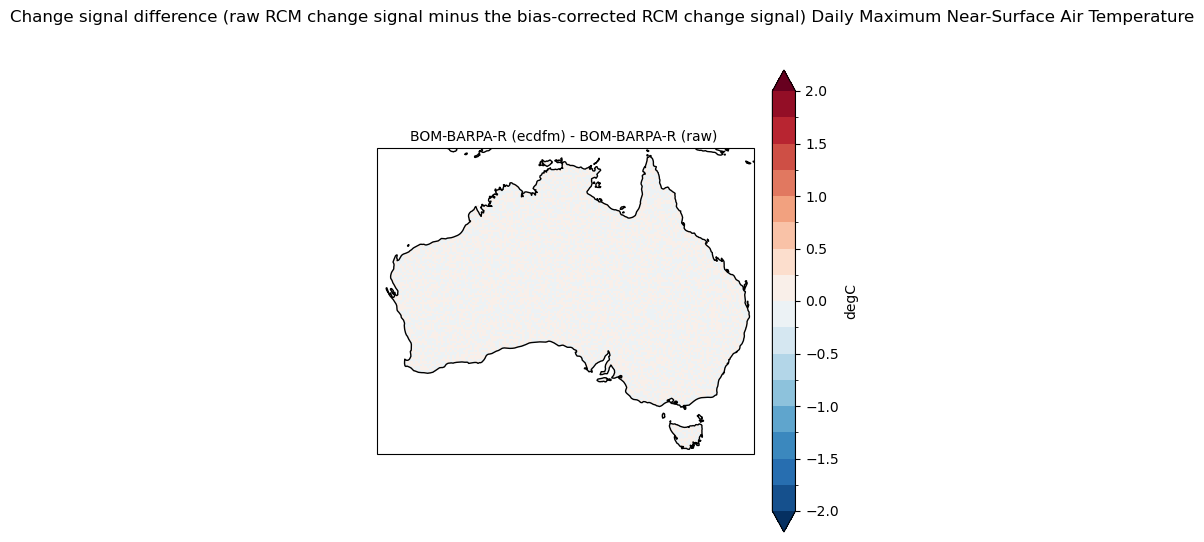

In [108]:
plot_comparison('tasmax', 'BOM-BARPA-R', 'RdBu_r', np.arange(-2, 2.01, 0.25))

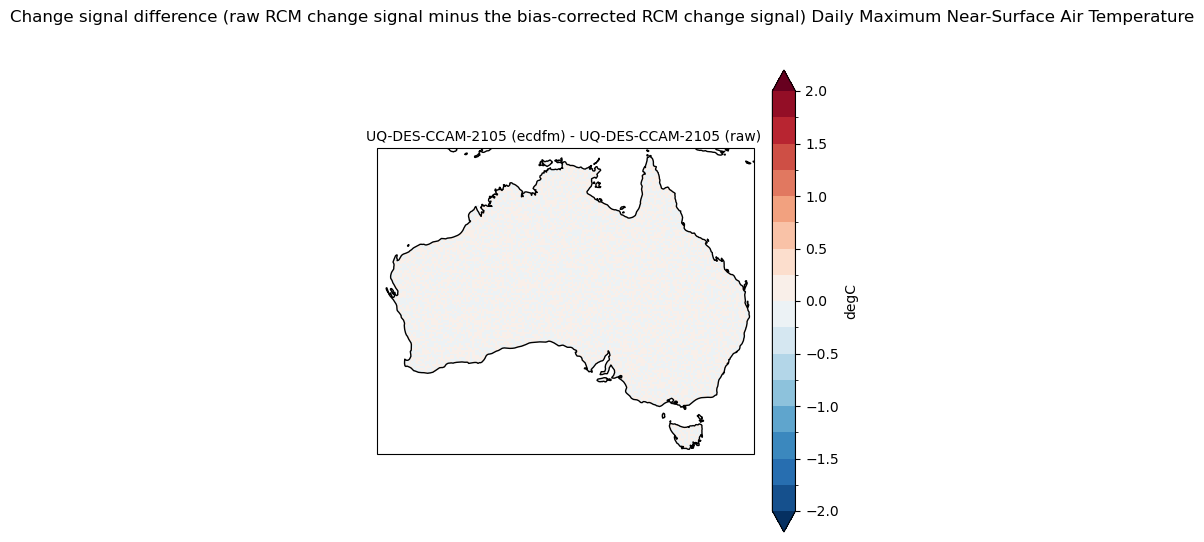

In [109]:
plot_comparison('tasmax', 'UQ-DES-CCAM-2105', 'RdBu_r', np.arange(-2, 2.01, 0.25))

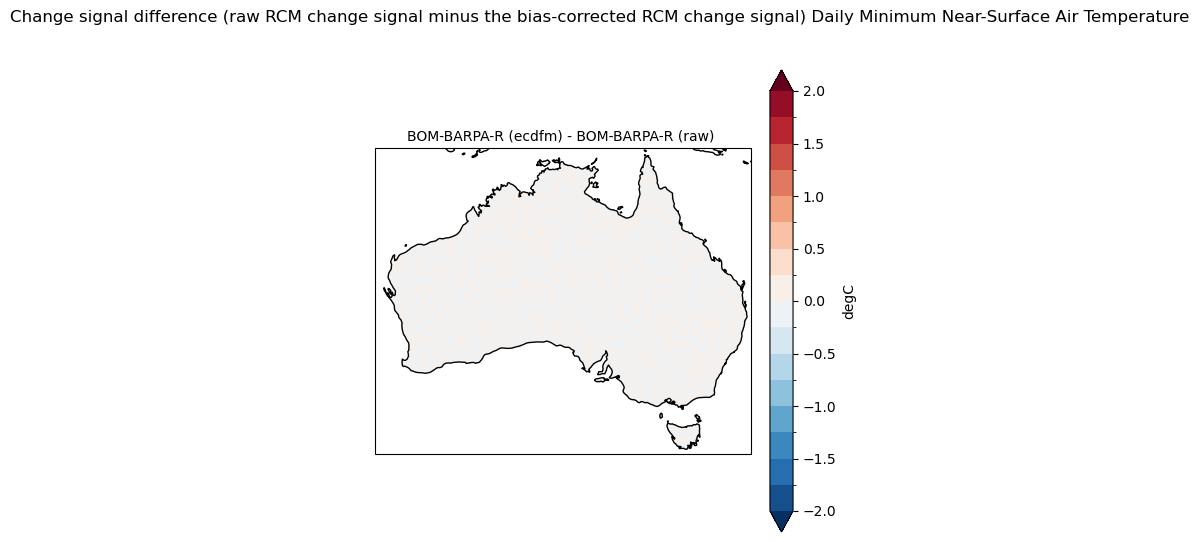

In [110]:
plot_comparison('tasmin', 'BOM-BARPA-R', 'RdBu_r', np.arange(-2, 2.01, 0.25))

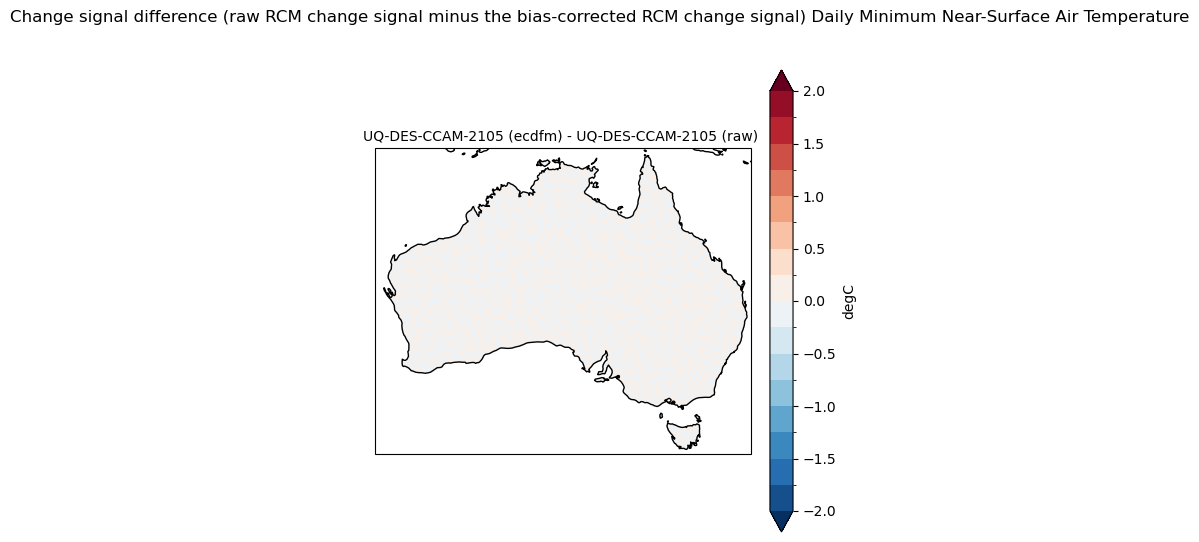

In [111]:
plot_comparison('tasmin', 'UQ-DES-CCAM-2105', 'RdBu_r', np.arange(-2, 2.01, 0.25))

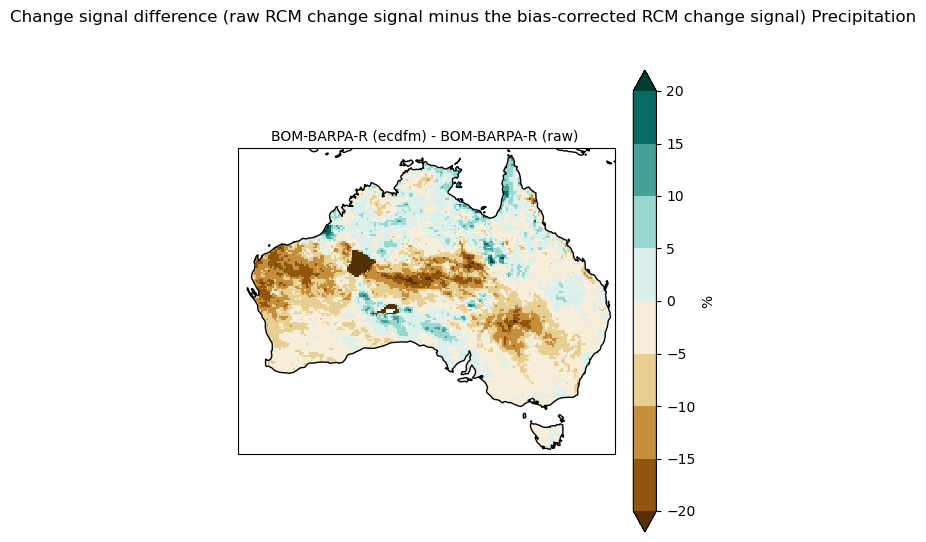

In [112]:
plot_comparison('pr', 'BOM-BARPA-R', 'BrBG', np.arange(-20, 20.1, 5))

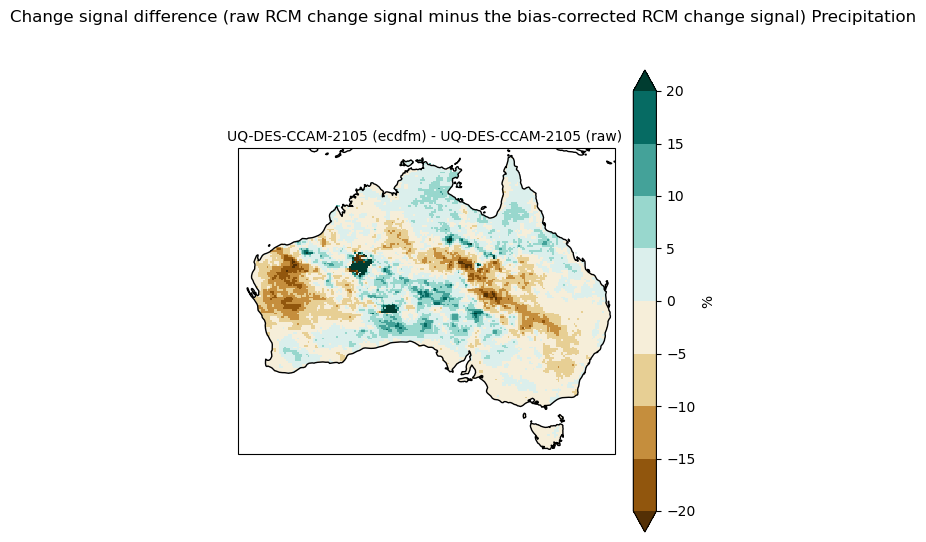

In [113]:
plot_comparison('pr', 'UQ-DES-CCAM-2105', 'BrBG', np.arange(-20, 20.1, 5))